# NeuroEvolution of Augmenting Topologies (NEAT)
Evolving the weights and the topologies of a Neural Networks using the NEAT algorithm.

In [186]:
import sys
import os
import numpy as np
import neat
import importlib
import pickle

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('../'))
import environment 
import utils
importlib.reload(environment)
importlib.reload(utils)

<module 'utils' from '/Users/lorenzoleuzzi/Documents/GitHub/lifelong_evolutionary_swarms/utils.py'>

In [187]:
env = environment.Environment(objective = [(environment.RED, environment.UP)],
                   size = environment.SIMULATION_ARENA_SIZE, 
                   n_neighbors = 3,
                   sensor_range = environment.SIMULATION_SENSOR_RANGE,
                   max_wheel_velocity = environment.SIMULATION_MAX_WHEEL_VELOCITY,
                   sensitivity = 0.5,
                   seed = 42,
                   initial_setting = environment.HARD_INITIAL_SETTING)
env.reset()
env.print_env()

. . . 0 . . 1 . . 2 . . 3 . . 4 . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . O O . . . . . . . . . . . . . .
. . . . . . . . . . . . O . . . . . . .
. . . . . . . O . . . . . . . . O . . .
. . . . . . . . . . . O . . . . . . . .
. . . O . . . . . . . O . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . O . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . O . . . . . . . . . O . . . O . .
. . . . . . . . O . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .



In [188]:
def calculate_fitnesses_neat(genomes, config, n_steps = 500, verbose=False):
    flag_done = False
    best_steps = n_steps

    for genome_id, genome in genomes:
        genome.fitness = 0.0
        
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        obs, _ = env.reset()
        if verbose: env.print_env()

        for step in range(n_steps):
            nn_inputs = env.process_observation(obs)
            nn_outputs = np.array([net.activate(nn_input) for nn_input in nn_inputs])
            actions = (2 * nn_outputs - 1) * env.max_wheel_velocity # Scale output sigmoid in range of wheel velocity

            obs, reward, done, _, _ = env.step(actions)
            genome.fitness += reward

            if verbose:
                # print("NN inputs: ", nn_inputs)
                print("Action: ", actions)
                print("\nStep", step)
                env.print_env()
                print("Observation: ", obs)
                print("Reward: ", reward)
            
            if done:
                genome.fitness += (n_steps - step) / 2
                flag_done = True
                if best_steps > step:
                    best_steps = step
                break
        
    if flag_done:
        print(f"Done in {best_steps} steps")

In [192]:
# Set configuration file
config_path = "../neat_config_ff.txt"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

config.genome_config.add_activation('neat_sigmoid', utils.neat_sigmoid)
config.pop_size = 5
# Create core evolution algorithm class
p = neat.Population(config)

# Add reporter for fancy statistical result
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

In [193]:
# Run NEAT
winner = p.run(calculate_fitnesses_neat, 50)


 ****** Running generation 0 ****** 

Population's average fitness: -1481.29980 stdev: 881.16058
Best fitness: -3.71180 - size: (3, 147) - species 1 - id 2
Average adjusted fitness: 0.374
Mean genetic distance 1.062, standard deviation 0.231
Population of 5 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     5     -3.7    0.374     0
Total extinctions: 0
Generation time: 2.497 sec

 ****** Running generation 1 ****** 



KeyboardInterrupt: 

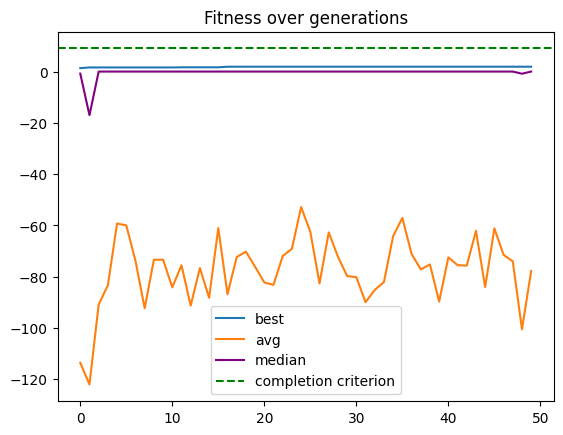

In [40]:
# Plot stats
bests = stats.get_fitness_stat(np.max)
avgs = stats.get_fitness_mean()
medians = stats.get_fitness_median()
stds = stats.get_fitness_stdev()
utils.plot_data(bests, avgs = avgs, medians = medians, 
                completion_fitness=env.n_task * (environment.REWARD_PICK + environment.REWARD_DROP))

Visualize the behaviour of the best individual

In [78]:
# read pickle
with open('../results/winners/pls1_neat_medium_300_best.pkl', 'rb') as f:
    winner_ = pickle.load(f)

In [191]:
calculate_fitnesses_neat([(1, winner)], config, verbose=True, n_steps=500)
winner.fitness

. . . 0 . . 1 . . 2 . . 3 . . 4 . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . O O . . . . . . . . . . . . . .
. . . . . . . . . . . . O . . . . . . .
. . . . . . . O . . . . . . . . O . . .
. . . . . . . . . . . O . . . . . . . .
. . . O . . . . . . . O . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . O . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . O . . . . . . . . . O . . . O . .
. . . . . . . . O . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .

Action:  [[ 1.99998198 -1.99998039 -1.89928231]
 [ 2.         -1.99999998 -1.95637047]
 [ 2.         -1.99999998 -1.95637047]
 [ 2.         -1.99999998 -1.95637047]
 [ 1.99999927 -2.         -2.     

1.3325000000000016